# Исследование объявлений о продаже квартир

Мне был предоставлен датасет с пользовательскими и картографическими(автоматическими) данными об объявлениях о продаже квартир в Ленинградской области. Я провел исследовательский анализ данных с предобработкой. 

### Открытие файла и изучение общей информации

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

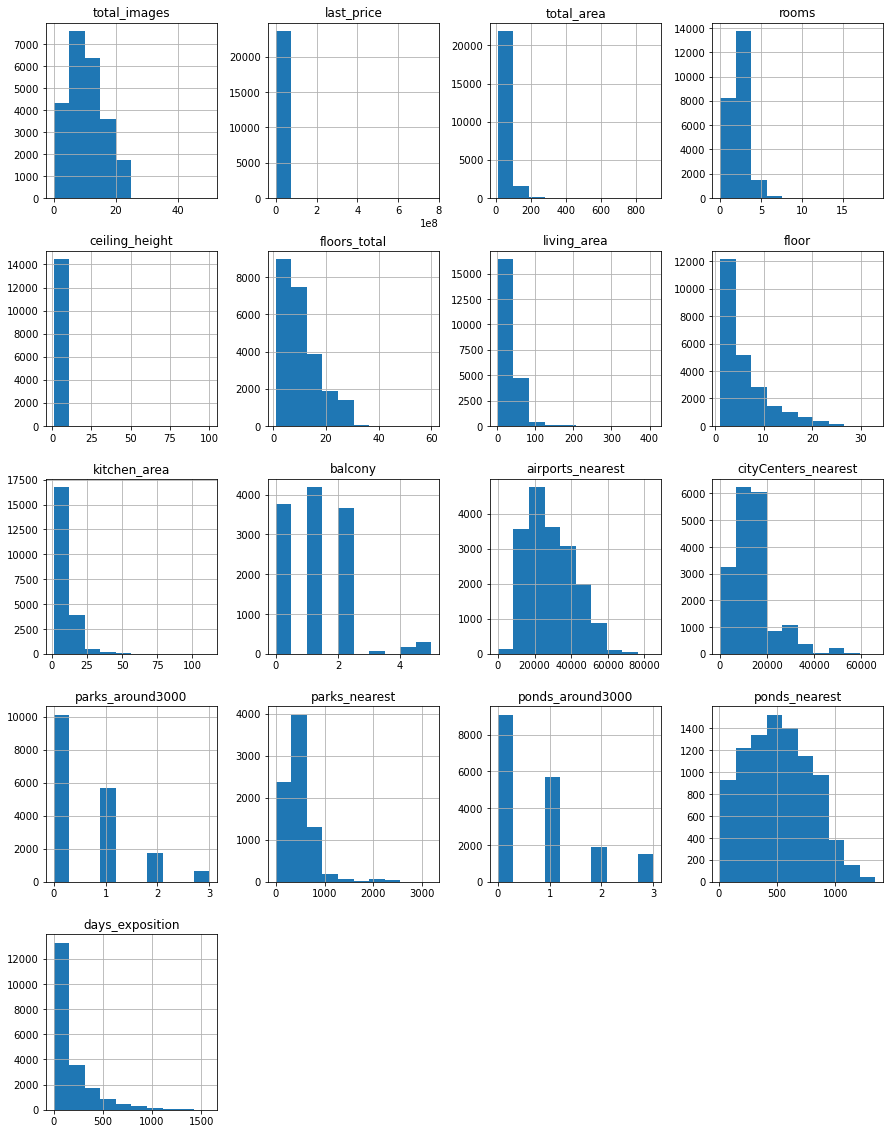

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', '\t')

display(data.head())
data.info()

data.hist(figsize = (15, 20))
plt.show()

По информации о датасете можно сказать, что есть пропуски более чем в половине столбцов, а также есть проблемы с типами данных(к примеру floors_total имеет тип вещественных чисел, хотя число этажей не может быть дробным). С этими проблемами надо будет разобраться в предобработке 

### Предобработка данных

1.Работа с пропусками

In [3]:
#Данные добавленные пользователем
#0
data = data.query('not locality_name.isna()')
#1
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#2
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
#3
data['is_apartment'] = data['is_apartment'].fillna(0)
#4
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
#5
data['balcony'] = data['balcony'].fillna(0)

#Картографичесие данные
#6
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
#7
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
#8
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

#9
data = data.query('not floors_total.isna()')

pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


0)Убрал строки с пропусками в locality_name, т.к. их мало(49) и т.к. это названия населенных пунктов их будет очень трудно заменить на что-то другое

1)Заменил пропуски в высоте потолков на медианные значения, т.к. медианное значение более точно отражает примерное значение высоты

2)Аналогично заменил жил. площадь

3)Заменил пропуски в is_apartment на 0, т.к. это категориальное значение(предпологаю, что так много пропусков в данном столбце из-за того что разница между апартаментами и квартирой известна далеко не всем)

4)Заменил значение площади кухни на медианное

5)Заменил пропуски в balcony на 0, т.к. скорее всего эти данные не указаны из-за отсутствия балконов в квартире

6)В столбцах с расстоянием и количестом до парков и прудов я все заменил на 0, т.к. эти пропуски могут означать, что рядом с квартирой нет парка или водоема. Это можно проверить, если мы возьмем все строки с parks_around3000 == 0 или с ponds_around3000, то во всех этих строках(кроме 4-ех для parks_around3000) parks_nearest или ponds_nearest будет NaN. Так же эти пропуски могут означать сбой в системе.

7)Заменил значение days_exposition на медианное. Эти пропуски могли появиться из-за того что
публикации объявлений не снимали или из-за тех.сбоя

8)Заменил пропуски в расстоянии до центра и аэропорта на медианные значения, т.к. медианное значение более точно отражает примерное значение

**Отдельные столбцы:** Столбец floors_total имеет очень мало пропусков, и при добалении в data столбец с типом этажа можно все пропуска добавить в "Другой" тип.

2.Изменение типов данных

In [4]:
#1
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

#2
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y.%m.%d')
#3
data['is_apartment'] = data['is_apartment'].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

1)Изменим тип данных float на int в столбцах с картографическими данными, balcony и days_exposition, т.к. эти значения не могут быть дробными

2)Изменим тип данных object на datetime для первого дня публикации, часы, минуты и секунды нам не понадобятся

3)Изменим тип object на bool в is_apartment

3.Поиск дубликатов

In [5]:
print("Кол-во уникальных названий до:", len(data['locality_name'].unique()))
for item in ['поселок ', 'посёлок ', 'деревня ', 'село ', 'городского типа ', 'городского типа ', 
             'городской ', 'коттеджный ', 'садовое товарищество ', 'станции ',  
            'садоводческое некоммерческое товарищество ', 'при железнодорожной ', 'имени ']:
    data['locality_name'] = data['locality_name'].str.replace(item, '')
print("Кол-во уникальных названий после", len(data['locality_name'].unique()))
print("Кол-во дубликатов среди объявлений", data.duplicated().sum()) 

Кол-во уникальных названий до: 364
Кол-во уникальных названий после 305
Кол-во дубликатов среди объявлений 0


В этом пункте я убрал все возможные имена нарицательные в названиях пунктов, т.к. они могут создавать неявные дубликаты, например "Поселок X" и "Посёлок X"

4.Устранение аномалий

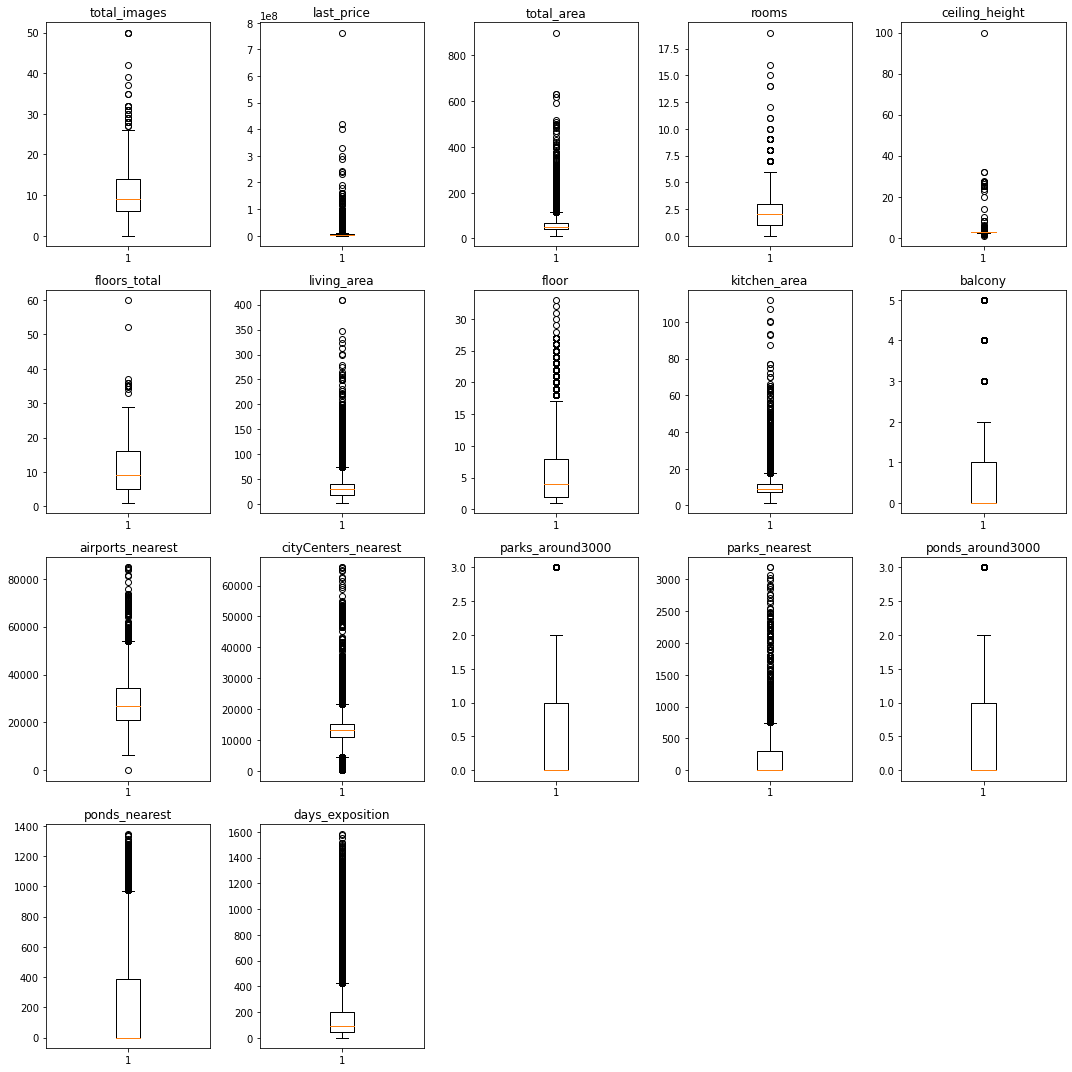

In [6]:
def bp(data, name):
    plt.boxplot(data)
    plt.title(name)
    plt.tight_layout()

data_bp = data.drop(['first_day_exposition', 'is_apartment', 'studio', 'open_plan', 'locality_name'], axis = 1)

fig = plt.figure(figsize = (15, 15))
for i in range(len(data_bp.columns)):
    fig.add_subplot(4, 5, i+1)
    bp(data_bp[data_bp.columns[i]], data_bp.columns[i])



Аномалий много, но рубить с плеча бессмысленно, т.к. они могут быть обусловлены спецификой данных, например нет ничего удивительно, что так много выбросов в parks_nearest, ведь в основном нет парков ближе 3км, за счет чего медиана равна нулю. Но есть очевидные аномалии в некоторых столбцах:

In [7]:
#1
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
data = data[data['ceiling_height'] >= 2] 
#2
data = data[data['rooms'] < 10]
data = data[data['rooms'] != 0] 
#3
data = data[data['airports_nearest'] != 0]
#4
data.loc[data['last_price'] < 1000000, 'last_price'] = data.loc[data['last_price'] > 20, 'last_price'] * 10

1)Делим значения высоты потолков, большие 20, на 10, т.к. это могли быть правильные значения с недописанной точкой, а также убираем значения потолков меньше двух, т.к. таких низких потолков скорее всего не существует 

2)Убираем объявления с двузначным числом комнат и нулевым

3)Убираем единственную строку с 0 метров до аэропорта

4)Домножаем значения в last_price, меньшие 1 000 000, на 10, т.к. это могли бы быть значения с недописанным нулем

**Вывод по разделу:** В ходе работы были убраны дубликаты, пропуски и аномалии, а также изменены типы данных у половины столбцов. В последующих разделах предобработка данных поможет провести качественный анализ неискаженных  данных.
    
По ощущениям работа с предобработкой данных - это самое трудоемкое в анализе данных

### Добавление в таблицу новых столбцов

In [8]:
data['square_price'] = (data['last_price'] / data['total_area']).astype('int')

data['exposition_day'] = pd.DatetimeIndex(data['first_day_exposition']).day_of_week
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year


def get_floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

data['floor_category'] = data.apply(get_floor_category, axis = 1)

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('int')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,exposition_day,exposition_month,exposition_year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,95,120370,3,3,2019,Другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0,0,81,82920,1,12,2018,Первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90,2,574,558,92785,3,8,2015,Другой,13
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84,3,234,424,408176,4,7,2015,Другой,6
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121,100000,1,6,2018,Другой,8


Добавил столбцы с ценой за кв.метр, днем недели, месяцем и годом объявления, категорией этажа и с расстоянием до центра в км

### Исследовательский анализ данных

1.Исследование различных параметров

         total_area   living_area  kitchen_area    last_price         rooms  \
count  23356.000000  23356.000000  23356.000000  2.335600e+04  23356.000000   
mean      60.444723     34.137789     10.423003  6.605057e+06      2.082848   
std       34.767654     20.740537      5.581207  1.057729e+07      1.038680   
min       12.000000      2.000000      1.300000  1.219000e+05      1.000000   
25%       40.200000     19.200000      7.300000  3.500000e+06      1.000000   
50%       52.000000     30.000000      9.100000  4.700000e+06      2.000000   
75%       70.000000     41.300000     11.500000  6.900000e+06      3.000000   
max      631.200000    347.500000    107.000000  7.630000e+08      9.000000   

       ceiling_height         floor  floors_total  cityCenters_nearest  \
count    23356.000000  23356.000000  23356.000000         23356.000000   
mean         2.698573      5.856397     10.625107         13947.696780   
std          0.252882      4.851282      6.565532          7577.36

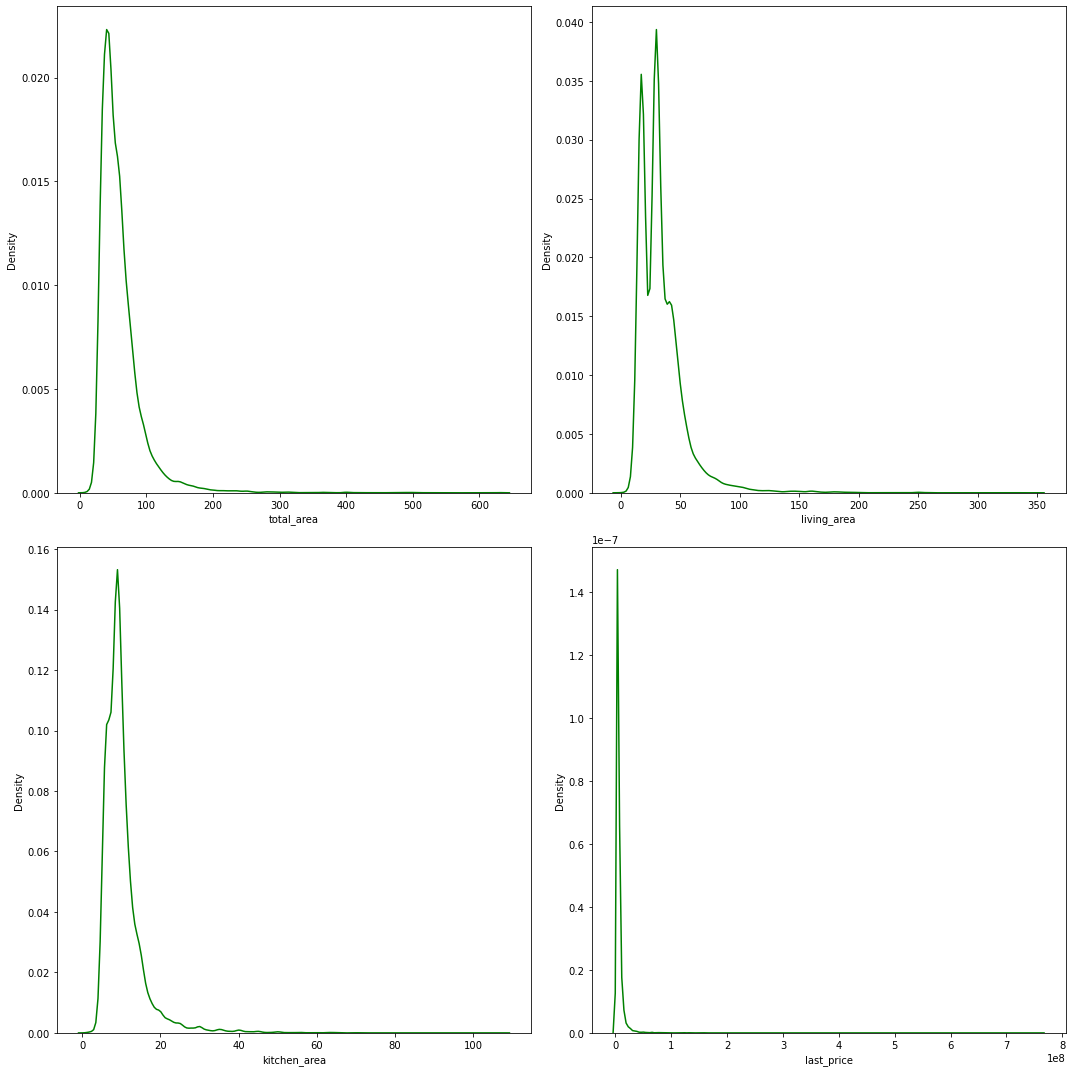

In [9]:
parametrs = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 
             'ceiling_height', 'floor', 'floor_category', 'floors_total', 'cityCenters_nearest',
             'airports_nearest', 'exposition_day', 'exposition_month', 'parks_nearest']
data_parametrs = data.loc[:, parametrs]
print(data_parametrs.describe())
fig = plt.figure(figsize = (15, 15))
fig.add_subplot(2, 2, 1)
sns.kdeplot(data_parametrs['total_area'], color = 'g')
# data_parametrs['total_area'].hist(bins = 20, range = (0, 400), legend = True)
plt.tight_layout()
fig.add_subplot(2, 2, 2)
sns.kdeplot(data_parametrs['living_area'], color = 'g')
# data_parametrs['living_area'].hist(bins = 20, range = (0, 200), legend = True)
plt.tight_layout()
fig.add_subplot(2, 2, 3)
sns.kdeplot(data_parametrs['kitchen_area'], color = 'g')
# data_parametrs['kitchen_area'].hist(bins = 20, range = (0, 80), legend = True)
plt.tight_layout()
fig.add_subplot(2, 2, 4)
sns.kdeplot(data_parametrs['last_price'], color = 'g')
# data_parametrs['last_price'].hist(bins = 15, range = (1000000, 14000000), legend = True)
plt.tight_layout()

По данным графикам видно, что у этих параметров смещенное нормальное распределение

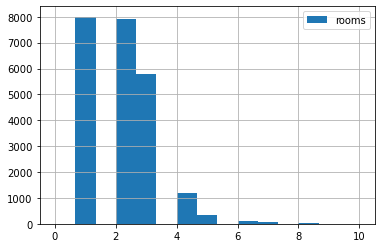

In [10]:
data_parametrs['rooms'].hist(bins = 15, range = (0, 10), legend = True)
plt.show()

По данной гистограмме можно сказать, что в основном продаются квартиры от 1 до 3 комнат.

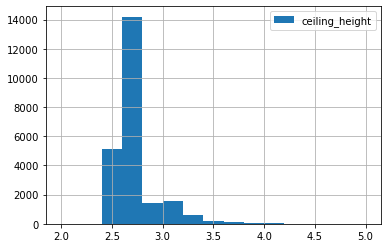

In [11]:
data_parametrs['ceiling_height'].hist(bins = 15, range = (2, 5), legend = True)
plt.show()

Можно сказать, что в большинстве квартир потолки от 2.4м до 2.8м

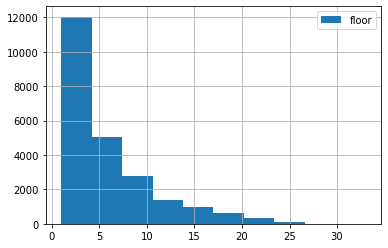

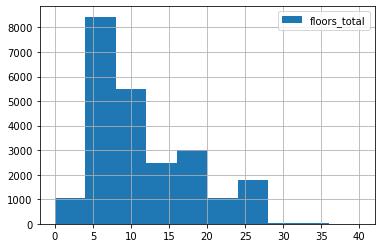

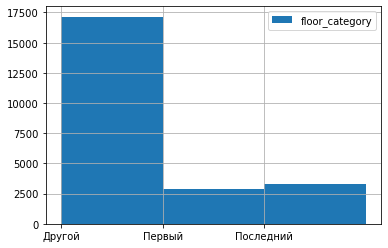

In [12]:
data_parametrs['floor'].hist(legend = True)
plt.show()
data_parametrs['floors_total'].hist(bins = 10, range = (0, 40), legend = True)
plt.show()
data_parametrs['floor_category'].hist(bins = 3, range = (0, 3), legend = True)
plt.show()

По графику floors видно, что большинство квартир расположены до десятого этажа, соотетственно это же можно посмотреть на графике floors_total(большинство зданий не превышают 10-ти этажей). Квартиры на последнем этаже продают чаще.


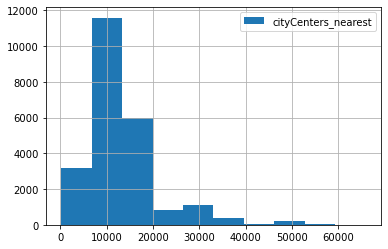

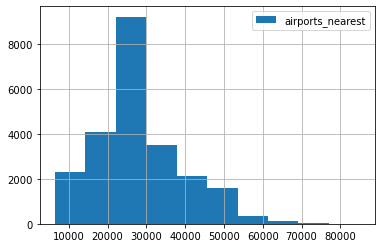

In [13]:
data_parametrs['cityCenters_nearest'].hist(legend = True)
plt.show()
data_parametrs['airports_nearest'].hist(legend = True)
plt.show()

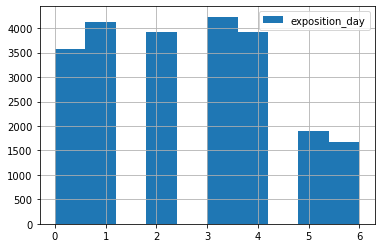

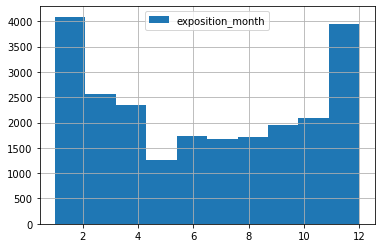

In [14]:
data_parametrs['exposition_day'].hist(legend = True)
plt.show()
data_parametrs['exposition_month'].hist(legend = True)
plt.show()

По графикам можно заметить, что реже всего выставляют объявления в выходные, предпологаю, что это связано с работой риелторов, т.е. люди продают квартиры с помощью риелтора, и соответственно риелтор выставляет на продажу квартиру в свой рабочий день. 

Также можно заметить, что в основном продают квартиры в декабре и январе, может быть это связано с новогодними праздниками


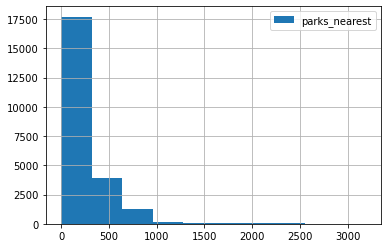

In [15]:
data_parametrs['parks_nearest'].hist(legend = True)
plt.show()

У большинства квартир рядом нет парков

2.Изучение того как быстро продавались квартиры

In [16]:
display(data['days_exposition'].value_counts().head(15))

95    3217
45     868
60     533
7      228
30     202
90     199
4      171
3      154
5      148
14     144
9      141
20     137
8      137
44     136
11     133
Name: days_exposition, dtype: int64

Можно увидеть, что значения 95, 45, 60, 7, 90, 30, которые встречаются чаще всего и как раз кратны пяти(или равны количеству дней в неделе). Я предпологаю, что в эти дни платформа автоматически убирает объявления

count    18109.000000
mean       196.602849
std        227.265051
min          1.000000
25%         44.000000
50%        115.000000
75%        260.000000
max       1580.000000
Name: days_exposition, dtype: float64

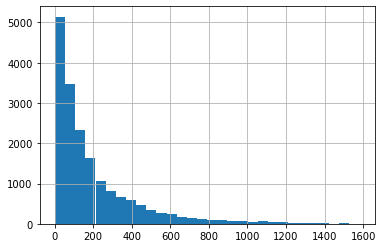

In [18]:
days_exposition_data = data.loc[~data['days_exposition'].isin([95, 45, 60, 7, 30, 90])]
display(days_exposition_data['days_exposition'].describe())
days_exposition_data['days_exposition'].hist(bins = 30)
plt.show()

**Вывод:** Необычайно долгими можно считать продажи более одного года, это видно по графику, это же нам показывает третий квартиль при вызове ф-ии describe

3.Какие параметры больше всего влияют на стоимость объекта

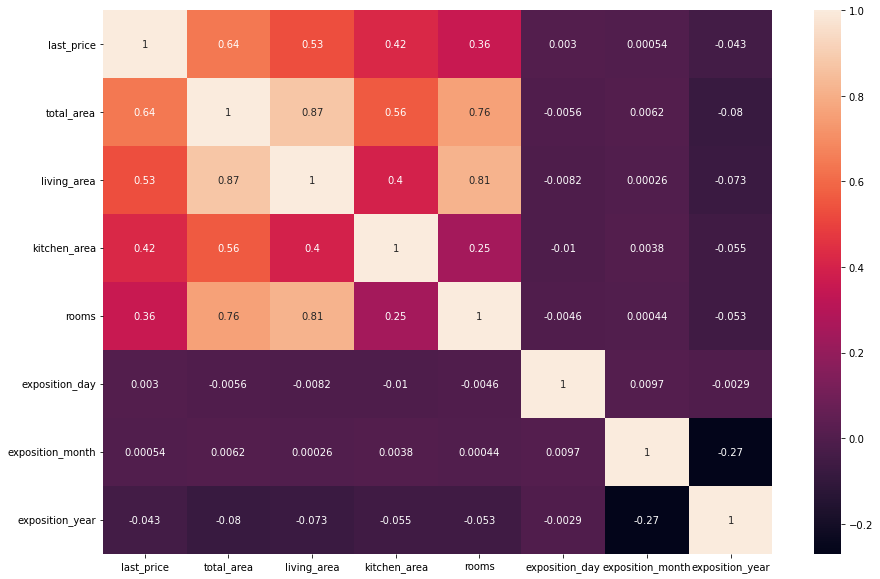

,last_price
floor_category,
Другой,4900000.0
Первый,4000000.0
Последний,4450000.0


,last_price
exposition_day,
6,4590000.0
4,4650000.0
5,4650000.0
0,4700000.0
3,4700000.0
1,4800000.0
2,4800000.0


,last_price
exposition_month,
6,4500000.0
5,4600000.0
10,4600000.0
8,4620000.0
1,4700000.0
3,4700000.0
7,4700000.0
2,4750000.0
12,4750000.0


,last_price
exposition_year,
2017,4550000.0
2016,4600000.0
2018,4650000.0
2019,5120000.0
2015,5350000.0
2014,7640000.0


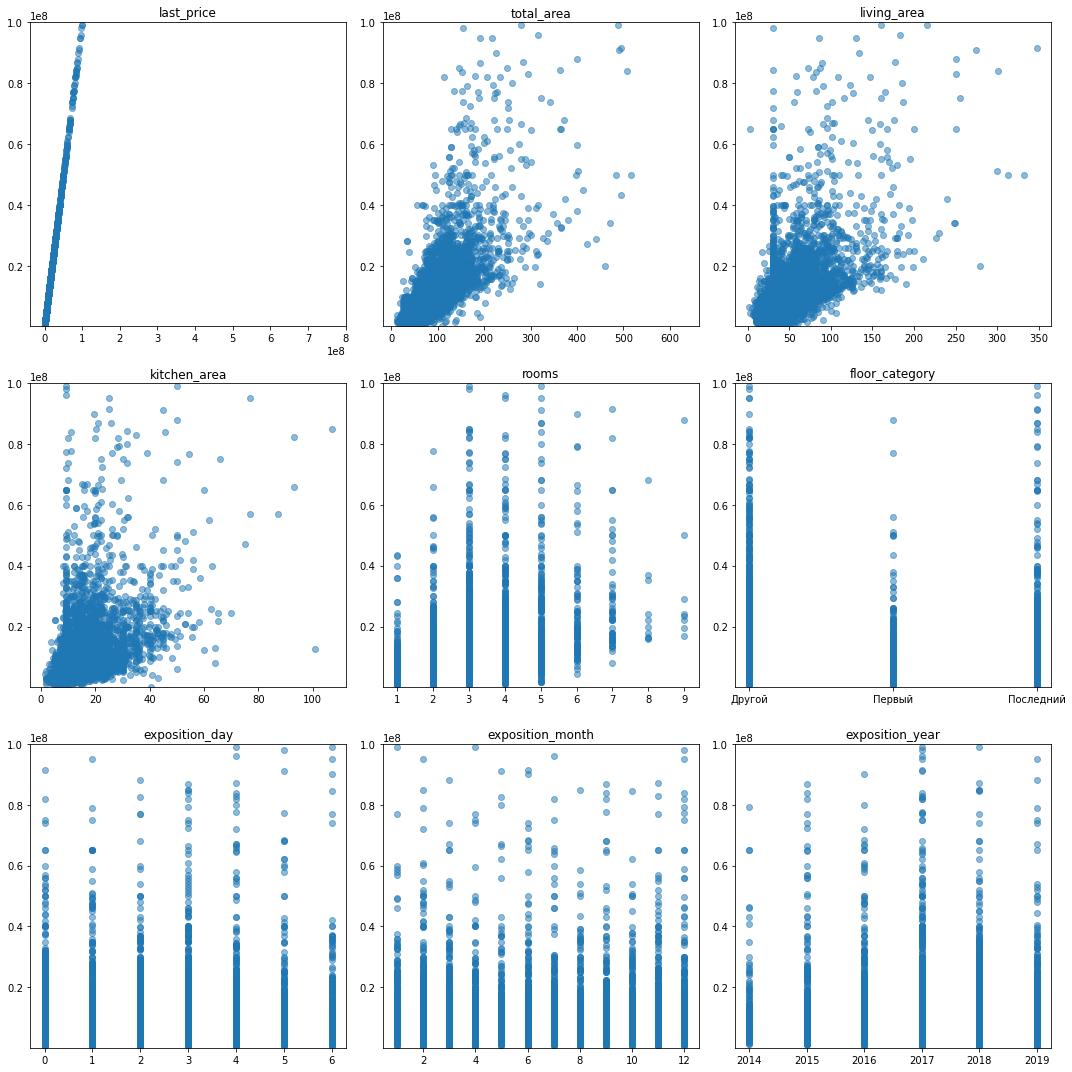

In [19]:
columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 
           'floor_category', 'exposition_day', 'exposition_month', 'exposition_year']
data_price = data.loc[: , columns]
plt.figure(figsize = (15, 10))
sns.heatmap(data_price.corr(), annot = True)
plt.show()
display(data_price.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'median'))    
display(data_price.pivot_table(index = 'exposition_day', values = 'last_price', aggfunc = 'median').sort_values('last_price'))    
display(data_price.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'median').sort_values('last_price'))    
display(data_price.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'median').sort_values('last_price'))    

fig = plt.figure(figsize = (15, 15))
for i in range(len(data_price.columns)):
    fig.add_subplot(3, 3, i+1)
    plt.scatter(data_price[data_price.columns[i]], data_price['last_price'], alpha = 0.5)
    plt.title(data_price.columns[i])
    plt.ylim((100000, 100000000))
    plt.tight_layout()


Вывод: 

1)Общая цена положительно зависит от площади(общая, жил., кухня) и количества комнат, но не полностью, т.е. корреляция положительна но не близка к 1

2)Первый этаж обычно дешевле остальных

3)Разницы в цене из-за продажи в определенный день или месяц не наблюдается, кроме того что в воскресенье не так много дорогих квартир выставляется на продажу

4)По медианным значениям можно сказать, что квартиры с 2014 года дешевели, а с 2018 начали дорожать

Рассмотрим динамику цены и площади продаваемых квартир


In [20]:
new = data.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = ['median'])
data.pivot_table(index = 'exposition_year', values = 'total_area', aggfunc = ['median']).join(new)

median           
                total_area last_price
exposition_year                      
2014                 76.18  7640000.0
2015                 60.00  5350000.0
2016                 53.10  4600000.0
2017                 52.00  4550000.0
2018                 50.80  4650000.0
2019                 52.00  5120000.0

**Вывод:** Со временем падала площадь продаваемых квартир и, как следствие, цена </div>

4.Топ 10 населенных пунктов по средней стоимости квадратного метра

In [21]:
data_locality = data.pivot_table(index = 'locality_name', values = 'square_price', aggfunc = ['count', 'median'])
data_locality.columns = ['count', 'median']
data_locality = data_locality.sort_values('count', ascending = False).head(10)
data_locality.sort_values('median')

,count,median
locality_name,,
Выборг,237,58666.0
Всеволожск,392,65789.0
Гатчина,307,67924.0
Колпино,338,74723.5
Шушары,435,76666.0
Мурино,559,84968.0
Парголово,323,91917.0
Кудрово,449,95185.0
Пушкин,369,100000.0


**Вывод:** Самый дорогой квадратный метр в Санкт-Петербурге, а самый дешевый в Выборге

5.Средняя цена километра в Санкт-Петербурге

,count,mean
cityCenters_nearest_km,,
0,86,187323.674419
1,238,166803.731092
6,466,152114.886266
5,764,147030.400524
2,304,146847.815789
7,402,140827.601990
4,897,137468.350056
27,2,132115.000000
3,520,129729.519231


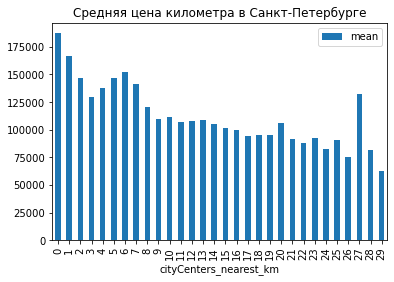

In [22]:
data_km = data[data['locality_name'] == 'Санкт-Петербург']
data_km = data_km.pivot_table(index = 'cityCenters_nearest_km', values = 'square_price', aggfunc = ['count', 'mean'])
data_km.columns = ['count', 'mean']
display(data_km.sort_values('mean', ascending = False).head(10))
data_km.plot(y = 'mean', kind = 'bar', title = 'Средняя цена километра в Санкт-Петербурге')
plt.show()

**Вывод:** Чем ближе к центру, тем дороже(самые дорогие - первые 8 километров). Может показаться что квартиры в 27км от центра дорогие, но по столбцу count можно увидеть, что из-за маленькой выборки среднее сильно искажается

### Общий вывод

При получении датасета я избавился от пропусков в столбцах, заменив их на нулевые или медианные значения, изменил некорректные типы данных, устранил аномалии и неявные дубликаты в названиях населенных пунктов.

Для удобства последующего анализа и визуализации добавил новые столбцы с днями недели, месяцами, годами, ценой кв. метра, расстояния до центра в км и типом этажа.

При проведении анализа я описал и визуализировал различные параметры выставляемых объявлений. Изучил как быстро продаются квартиры: "долгим" объявление можно считать спустя год после выставления на продажу. Исследовал зависимость цены от различных параметров: цена растет с ростом кухонной площади, площади жилой и общей, и в меньшей мере с ростом числа комнат. Выяснил, что среди топ-10 населенных пунктов по количеству объявлений самая высокая цена квадратного метра в Санкт-Петербурге, а самая низкая в Выборге. И наконец определил, что чем ближе к центру, тем дороже стоит квартира
